In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('resources/nba_new.csv', index_col = 'Unnamed: 0')

Data Processing(Veri Ön İşleme)

In [3]:
#Veri setinin ilk 5 satırını görelim.
print(df.head())

            Name            Team  Number Position   Age Height  Weight  \
0  Avery Bradley  Boston Celtics     0.0       PG  25.0    6-2   180.0   
1    Jae Crowder  Boston Celtics    99.0       SF  25.0    6-6   235.0   
2   John Holland  Boston Celtics    30.0       SG  27.0    6-5   205.0   
3    R.J. Hunter  Boston Celtics    28.0       SG  22.0    6-5   185.0   
4  Jonas Jerebko  Boston Celtics     8.0       PF  29.0   6-10   231.0   

             College     Salary       Sport  
0              Texas  7730337.0  Basketball  
1          Marquette  6796117.0  Basketball  
2  Boston University        NaN  Basketball  
3      Georgia State  1148640.0  Basketball  
4                NaN  5000000.0  Basketball  


In [4]:
print("Veri setinin boyutu", df.shape)

Veri setinin boyutu (458, 10)


In [5]:
print('Sütun isimleri:', df.columns)

Sütun isimleri: Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Height', 'Weight',
       'College', 'Salary', 'Sport'],
      dtype='object')


In [6]:
print("Eksik veriler:\n", df.isnull().sum())

Eksik veriler:
 Name         1
Team         1
Number       1
Position     1
Age          1
Height       1
Weight       1
College     85
Salary      12
Sport        0
dtype: int64


In [7]:
# Team sütunundaki benzersiz değerlerin listesi
print("Benzersiz takımlar:", df['Team'].unique())

Benzersiz takımlar: ['Boston Celtics' 'Brooklyn Nets' 'New York Knicks' 'Philadelphia 76ers'
 'Toronto Raptors' 'Golden State Warriors' 'Los Angeles Clippers'
 'Los Angeles Lakers' 'Phoenix Suns' 'Sacramento Kings' 'Chicago Bulls'
 'Cleveland Cavaliers' 'Detroit Pistons' 'Indiana Pacers'
 'Milwaukee Bucks' 'Dallas Mavericks' 'Houston Rockets'
 'Memphis Grizzlies' 'New Orleans Pelicans' 'San Antonio Spurs'
 'Atlanta Hawks' 'Charlotte Hornets' 'Miami Heat' 'Orlando Magic'
 'Washington Wizards' 'Denver Nuggets' 'Minnesota Timberwolves'
 'Oklahoma City Thunder' 'Portland Trail Blazers' 'Utah Jazz' nan]


In [8]:
# Team sütunundaki benzersiz değerlerin sayısı
print("Benzersiz takımların sayısı:", df['Team'].nunique())

Benzersiz takımların sayısı: 30


In [9]:
#Position sütununa göre gruplandırma yapıp ortalama 'Age'değerini bulalım
avg_age_by_position = df.groupby('Position')['Age'].mean().sort_values(ascending=False)
print(avg_age_by_position)

Position
C     27.371795
PF    27.160000
SF    26.858824
PG    26.847826
SG    26.539216
Name: Age, dtype: float64


Tanımlayıcı istatistik(descriptive statistics) örnekleri

In [10]:
print(df.describe())

           Number         Age      Weight        Salary
count  457.000000  457.000000  457.000000  4.460000e+02
mean    17.678337   26.938731  221.522976  4.842684e+06
std     15.966090    4.404016   26.368343  5.229238e+06
min      0.000000   19.000000  161.000000  3.088800e+04
25%      5.000000   24.000000  200.000000  1.044792e+06
50%     13.000000   26.000000  220.000000  2.839073e+06
75%     25.000000   30.000000  240.000000  6.500000e+06
max     99.000000   40.000000  307.000000  2.500000e+07


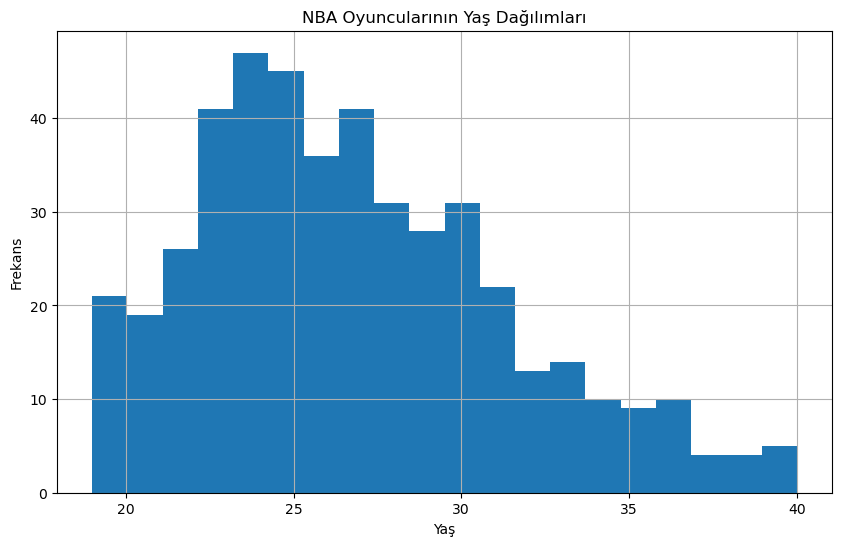

In [11]:
#Histogram: Gruplandırılmış bir veri dağılımının sütun grafiği ile gösterimidir.
#'Age' sütunu için histogram çizelim
plt.figure(figsize=(10,6))
df['Age'].hist(bins=20)
plt.title('NBA Oyuncularının Yaş Dağılımları')
plt.xlabel('Yaş')
plt.ylabel('Frekans')
plt.show()

In [12]:
#Korelasyon: İki rassal değişken arasındaki doğrusal ilişkinin yönünü ve gücünü belirtir.
#Genel istatistikte korelasyon, bağımsızlık durumundan ne kadar uzaklaşıldığını gösterir.
#'Weight' ve 'Height' sütunları arasındaki korelasyonu hesaplayalım.

print(df['Weight'].dtype)
print(df['Height'].dtype)

float64
object


In [13]:
def feet_inches_to_cm(height_str):
    try:
        feet, inches = map(int, height_str.split('-'))
        return (feet*30.48) + (inches*2.54)
    except:
        return np.nan

In [14]:
df['Height_cm'] = df['Height'].apply(feet_inches_to_cm)

In [15]:
print(df['Weight'].isna().sum())
print(df['Height'].isna().sum())

1
1


In [16]:
correlation = df['Weight'].corr(df['Height_cm'])
print(f"\nAğırlık ve boy arasındaki korelasyon: {correlation:.2f}")


Ağırlık ve boy arasındaki korelasyon: 0.83


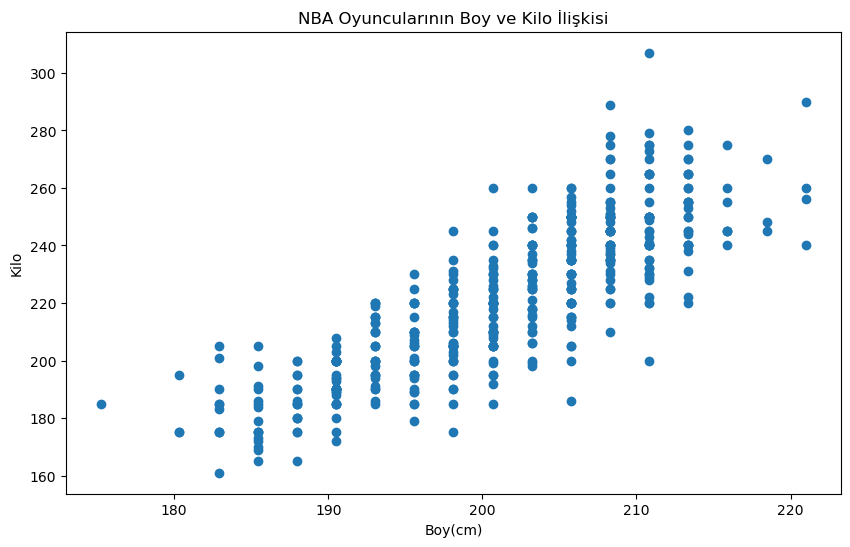

In [17]:
#Scatter plot ile ilişkiyi görselleştirelim
plt.figure(figsize=(10,6))
plt.scatter(df['Height_cm'], df['Weight'])
plt.title("NBA Oyuncularının Boy ve Kilo İlişkisi")
plt.xlabel("Boy(cm)")
plt.ylabel("Kilo")
plt.show()

In [18]:
#Salary sütunundaki en yüksek 5 değeri görelim.
top_salaries = df.nlargest(5, 'Salary')[['Name','Team','Salary']].reset_index(drop=True)
print("En Yüksek 5 Maaş:\n",top_salaries)

En Yüksek 5 Maaş:
               Name                 Team      Salary
0      Kobe Bryant   Los Angeles Lakers  25000000.0
1     LeBron James  Cleveland Cavaliers  22970500.0
2  Carmelo Anthony      New York Knicks  22875000.0
3    Dwight Howard      Houston Rockets  22359364.0
4       Chris Bosh           Miami Heat  22192730.0


In [19]:
print(df['Age'].isnull().sum())

1


In [20]:
def categorize_age(age):
    if pd.isna(age):
        return 'Unknown'
    elif 20 <= age <= 25:
        return '20-25'
    elif 26 <= age <= 30:
        return '26-30'
    elif 31 <= age <= 35:
        return '31-35'
    else:
        return '35+'

In [21]:
df['Age_Group'] = df['Age'].apply(categorize_age)

print(df[['Age', 'Age_Group']])

      Age Age_Group
0    25.0     20-25
1    25.0     20-25
2    27.0     26-30
3    22.0     20-25
4    29.0     26-30
..    ...       ...
453  26.0     26-30
454  24.0     20-25
455  26.0     26-30
456  26.0     26-30
457   NaN   Unknown

[458 rows x 2 columns]


In [22]:
print("Takımlar:\n",df['Team'].unique())
print("\nTakım Sayısı:", df['Team'].nunique())

Takımlar:
 ['Boston Celtics' 'Brooklyn Nets' 'New York Knicks' 'Philadelphia 76ers'
 'Toronto Raptors' 'Golden State Warriors' 'Los Angeles Clippers'
 'Los Angeles Lakers' 'Phoenix Suns' 'Sacramento Kings' 'Chicago Bulls'
 'Cleveland Cavaliers' 'Detroit Pistons' 'Indiana Pacers'
 'Milwaukee Bucks' 'Dallas Mavericks' 'Houston Rockets'
 'Memphis Grizzlies' 'New Orleans Pelicans' 'San Antonio Spurs'
 'Atlanta Hawks' 'Charlotte Hornets' 'Miami Heat' 'Orlando Magic'
 'Washington Wizards' 'Denver Nuggets' 'Minnesota Timberwolves'
 'Oklahoma City Thunder' 'Portland Trail Blazers' 'Utah Jazz' nan]

Takım Sayısı: 30


In [23]:
def categorize_conference(team):
    eastern_teams = [
        'Boston Celtics', 'Brooklyn Nets', 'New York Knicks', 'Philadelphia 76ers', 'Toronto Raptors',
        'Chicago Bulls', 'Cleveland Cavaliers', 'Detroit Pistons', 'Indiana Pacers', 'Miami Heat',
        'Milwaukee Bucks', 'Orlando Magic', 'Washington Wizards', 'Atlanta Hawks', 'Charlotte Hornets'
    ]
    
    western_teams = [
        'Golden State Warriors', 'Los Angeles Clippers', 'Los Angeles Lakers', 'Phoenix Suns', 'Sacramento Kings',
        'Dallas Mavericks', 'Houston Rockets', 'Memphis Grizzlies', 'Minnesota Timberwolves', 'New Orleans Pelicans',
        'Oklahoma City Thunder', 'Portland Trail Blazers', 'San Antonio Spurs', 'Utah Jazz'
    ]
    
    if team in eastern_teams:
        return 'Doğu'
    elif team in western_teams:
        return 'Batı'
    else:
        return 'Unknown'
        

df['Conference'] = df['Team'].apply(categorize_conference)
print(df[['Team', 'Conference']])

               Team Conference
0    Boston Celtics       Doğu
1    Boston Celtics       Doğu
2    Boston Celtics       Doğu
3    Boston Celtics       Doğu
4    Boston Celtics       Doğu
..              ...        ...
453       Utah Jazz       Batı
454       Utah Jazz       Batı
455       Utah Jazz       Batı
456       Utah Jazz       Batı
457             NaN    Unknown

[458 rows x 2 columns]


In [24]:
print(df[['Team', 'Salary']])

               Team     Salary
0    Boston Celtics  7730337.0
1    Boston Celtics  6796117.0
2    Boston Celtics        NaN
3    Boston Celtics  1148640.0
4    Boston Celtics  5000000.0
..              ...        ...
453       Utah Jazz  2433333.0
454       Utah Jazz   900000.0
455       Utah Jazz  2900000.0
456       Utah Jazz   947276.0
457             NaN        NaN

[458 rows x 2 columns]


In [25]:
#Eksik verilerin içini ortalama 'Salary' değeriyle doldur
df['Salary'] = df['Salary'].fillna(df['Salary'].mean()).infer_objects(copy=False)

#Maaş değerini milyon dolar cinsine çeviren fonksiyon
def convert_to_millions(salary):
    return round(salary / 1_000_000, 1)

#Salary sütunundaki değerleri milyon dolar cinsine dönüştürme ve yeni sütun ekleme
df['SalaryInMillions'] = df['Salary'].apply(lambda x: convert_to_millions(x) if pd.notna(x) else x)

top_salaries = df.nlargest(10, 'SalaryInMillions')[['Name','Team','Salary','SalaryInMillions']].reset_index(drop=True)
print(top_salaries)

              Name                   Team      Salary  SalaryInMillions
0      Kobe Bryant     Los Angeles Lakers  25000000.0              25.0
1     LeBron James    Cleveland Cavaliers  22970500.0              23.0
2  Carmelo Anthony        New York Knicks  22875000.0              22.9
3    Dwight Howard        Houston Rockets  22359364.0              22.4
4       Chris Bosh             Miami Heat  22192730.0              22.2
5       Chris Paul   Los Angeles Clippers  21468695.0              21.5
6     Kevin Durant  Oklahoma City Thunder  20158622.0              20.2
7     Derrick Rose          Chicago Bulls  20093064.0              20.1
8      Dwyane Wade             Miami Heat  20000000.0              20.0
9      Brook Lopez          Brooklyn Nets  19689000.0              19.7


Tanımlayıcı İstatistik(Descriptive Statistics)

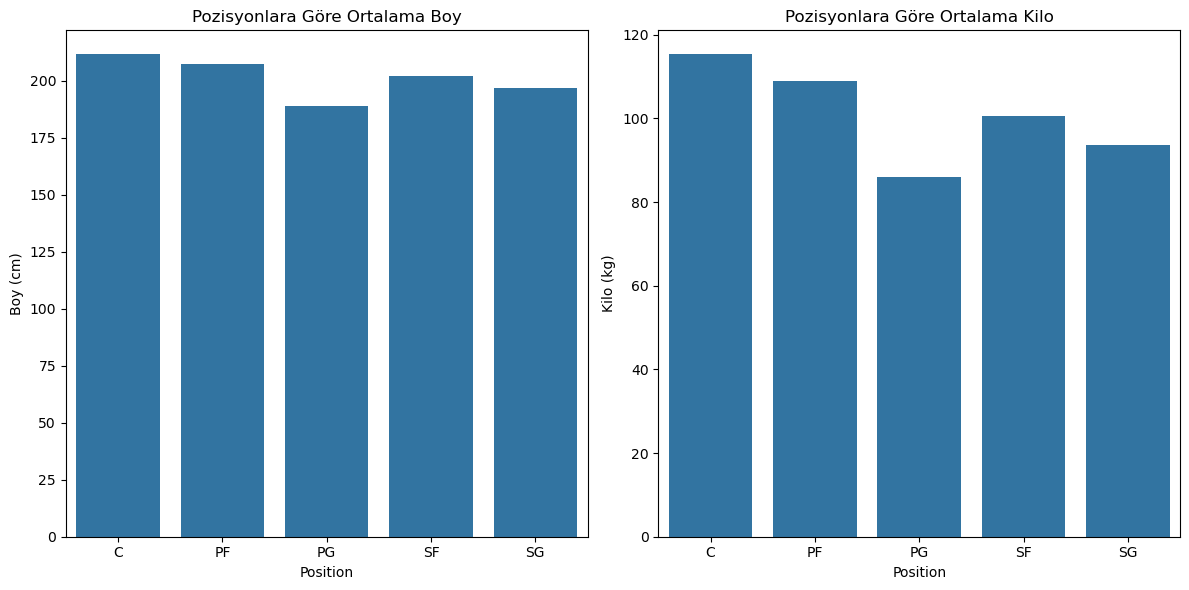

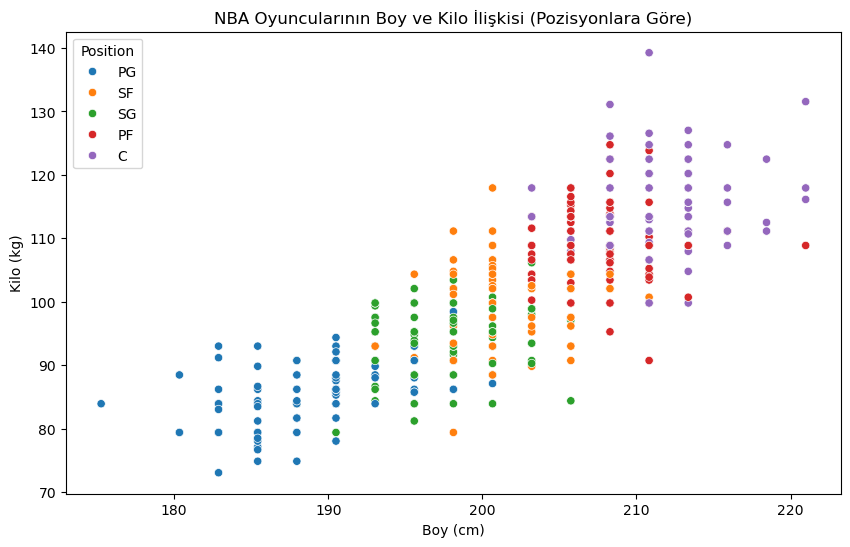

In [26]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ağırlığı lbs'den kg'ye çeviren fonksiyon
def lbs_to_kg(weight_lbs):
    return round(weight_lbs * 0.453592, 2)

# Boyu feet-inches'den cm'ye çeviren fonksiyon
def feetInches_to_cm(height_str):
    try:
        feet, inches = map(int, height_str.split('-'))
        return (feet * 30.48) + (inches * 2.54)
    except:
        return np.nan

# Veriyi dönüştürme
df['WeightInKg'] = df['Weight'].apply(lambda x: lbs_to_kg(x) if pd.notna(x) else x)
df['HeightInCm'] = df['Height'].apply(lambda x: feetInches_to_cm(x) if pd.notna(x) else x)

# Her pozisyondaki ortalama boy ve kilo
avg_stats = df.groupby('Position').agg({'HeightInCm': 'mean', 'WeightInKg': 'mean'})

plt.figure(figsize=(12,6))

# Boy Grafiği
plt.subplot(1, 2, 1)
sns.barplot(x=avg_stats.index, y='HeightInCm', data=avg_stats)
plt.title('Pozisyonlara Göre Ortalama Boy')
plt.ylabel('Boy (cm)')

# Kilo Grafiği
plt.subplot(1, 2, 2)
sns.barplot(x=avg_stats.index, y='WeightInKg', data=avg_stats)
plt.title('Pozisyonlara Göre Ortalama Kilo')
plt.ylabel('Kilo (kg)')

plt.tight_layout()
plt.show()

# Scatter plot ile boy ve kilo ilişkisini pozisyonlara göre gösterelim
plt.figure(figsize=(10,6))
sns.scatterplot(x='HeightInCm', y='WeightInKg', hue='Position', data=df)
plt.title('NBA Oyuncularının Boy ve Kilo İlişkisi (Pozisyonlara Göre)')
plt.xlabel('Boy (cm)')
plt.ylabel('Kilo (kg)')
plt.show()
